In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
print(customers.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [5]:
print("Customers Summary:\n", customers.describe(include='all'))

Customers Summary:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3


In [6]:
print("Missing Values in Customers Dataset:\n", customers.isnull().sum())

Missing Values in Customers Dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [7]:
print(customers.duplicated().sum())

0


In [8]:
print(products.head())


  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [9]:

print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [10]:
products.info()
print(products.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN     

In [11]:
transactions.info()
print(transactions.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00992      C0109      P059  2024-04-21 10:52:24          NaN   
freq               1         11        19                    1          NaN   
mean             NaN   

In [12]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [13]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [14]:
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0


In [15]:
print(customers.dtypes)
print(transactions.dtypes)

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [18]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

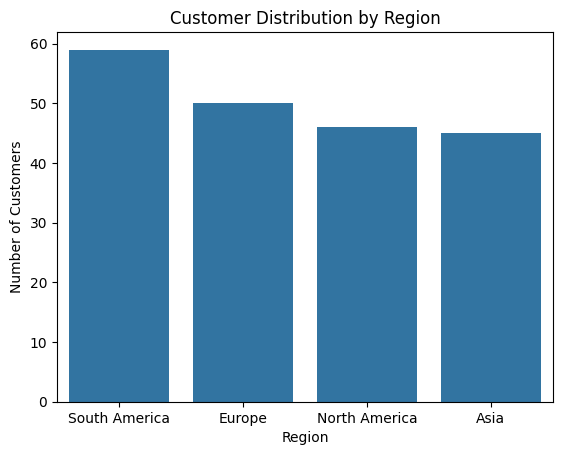

In [19]:
# Count customers by region
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


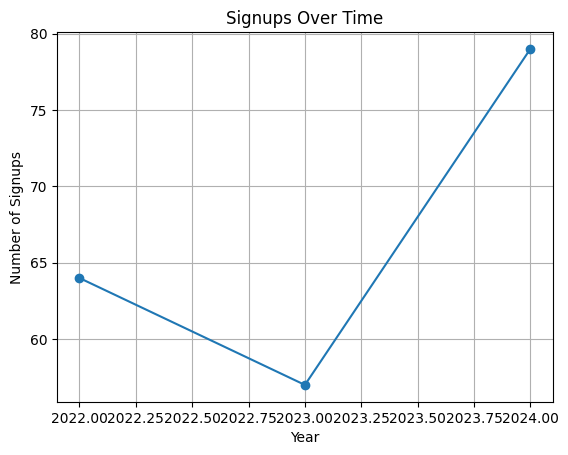

In [20]:
# Signup trend analysis
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trend = customers['SignupYear'].value_counts().sort_index()

# Plot
signup_trend.plot(kind='line', marker='o', title='Signups Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()


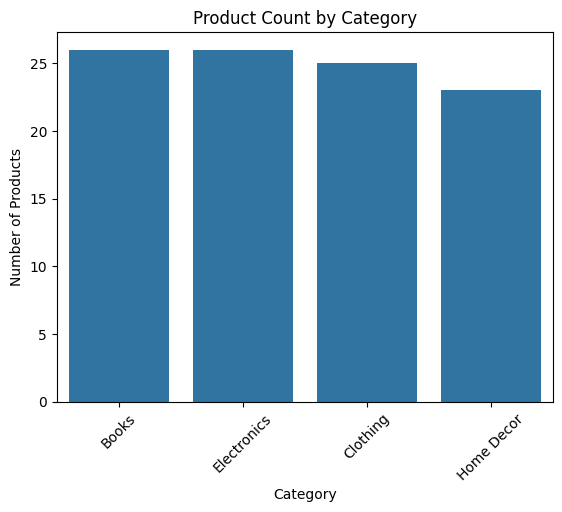

In [21]:
# Count products by category
category_counts = products['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Product Count by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


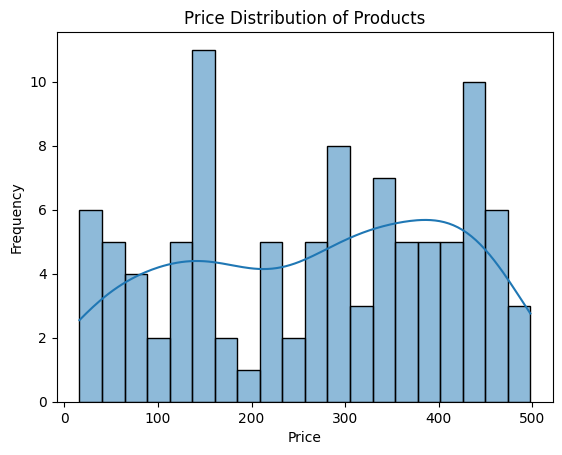

In [22]:
# Price distribution
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


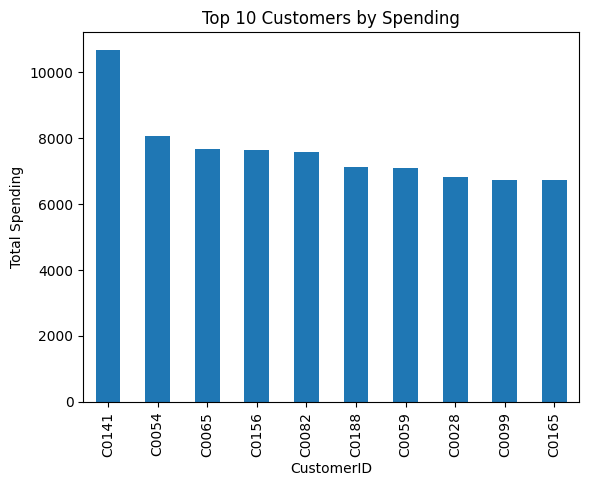

In [23]:
# Top customers by total spending
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Spending')
plt.xlabel('CustomerID')
plt.ylabel('Total Spending')
plt.show()


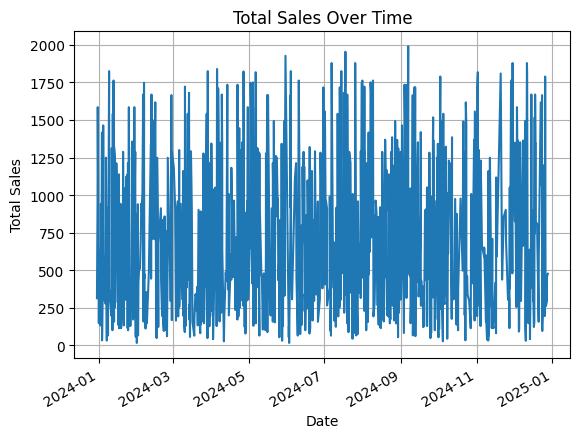

In [24]:
# Total sales over time
sales_trend = transactions.groupby('TransactionDate')['TotalValue'].sum()

# Plot
sales_trend.plot(kind='line', title='Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


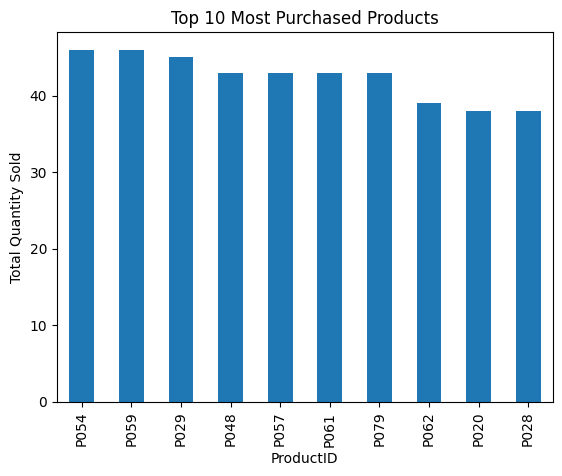

In [25]:
# Most frequently purchased products
popular_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
popular_products.plot(kind='bar', title='Top 10 Most Purchased Products')
plt.xlabel('ProductID')
plt.ylabel('Total Quantity Sold')
plt.show()


### combining dataset

In [26]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Preview merged data
print(merged_data.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  SignupYear  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03        2022   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04        2024   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04        2024   
3      601.36   300.68  Travis Campbell  South America 2024-04-11        2024   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15        2022   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speake

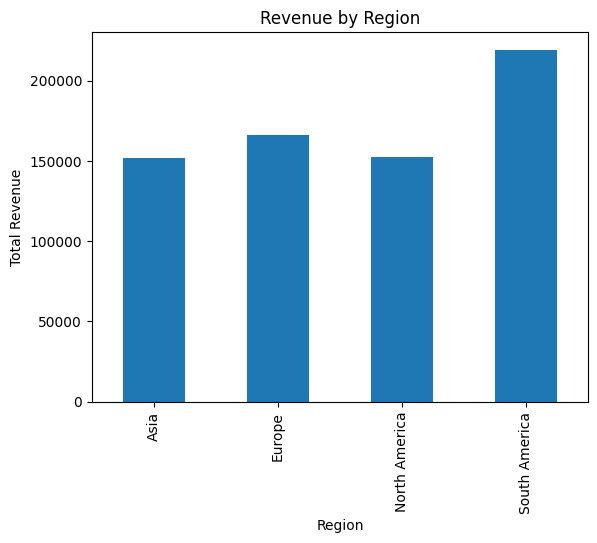

In [27]:
# Revenue by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum()

# Plot
region_revenue.plot(kind='bar', title='Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()


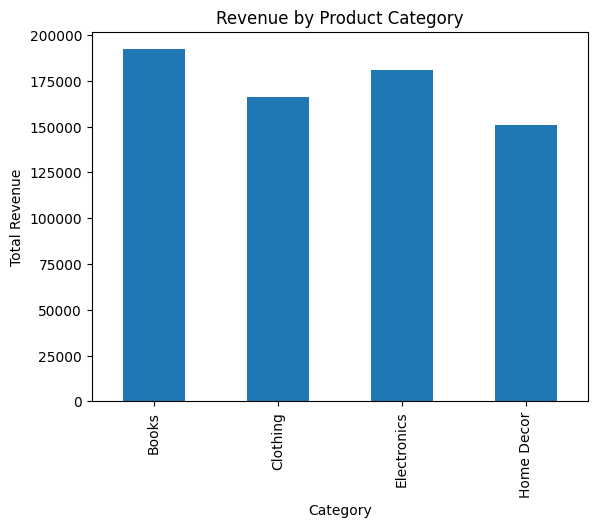

In [28]:
# Revenue by product category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum()

# Plot
category_revenue.plot(kind='bar', title='Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()
